In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from IPython.display import clear_output, display
from tqdm.notebook import tqdm
import time
import matplotlib.pyplot as plt
import matplotlib as mpl

In [27]:
# Load the CPP Profile Predicted 1534 proteins .csv
df_predicted = pd.read_csv('/Users/doma/Documents/Bachelor Arbeit/1.Task_BA/Human_N_Out_Proteome.csv')
df_predicted.head(5)

,entry,name,gene_name,PRED_MEAN [%],PRED_STD [%],organism,dataset,class,pred_class,new_hc_substrate,...,length,len_signal_pep,len_top_n,len_tmd,len_top_c,jmd_n,tmd,jmd_c,tmd_AN,len_tmd_AN
0,P16150,LEUK_HUMAN,SPN,95.22,2.02,HUMAN,SUBEXPERT,SS_TYPE1,HC substrate,0,...,400,19,234,23,124,PFRNPDENSR,GMLPVAVLVALLAVIVLVALLLL,WRRRQKRRTG,UP,23
1,P28827,PTPRM_HUMAN,PTPRM,94.79,2.09,HUMAN,SUBEXPERT,SS_TYPE1,HC substrate,0,...,1452,20,722,22,688,PEKQTDHTVK,IAGVIAGILLFVIIFLGVVLVM,KKRKLAKKRK,UP,22
2,P10586,PTPRF_HUMAN,PTPRF,94.64,2.03,HUMAN,SUBEXPERT,SS_TYPE1,HC substrate,0,...,1907,29,1234,21,623,QQQEEPEMLW,VTGPVLAVILIILIVIAILLF,KRKRTHSPSS,UP,21
3,Q06418,TYRO3_HUMAN,TYRO3,94.49,2.14,HUMAN,SUBEXPERT,SS_TYPE1,HC substrate,0,...,890,40,389,21,440,QGPPHSRTSW,VPVVLGVLTALVTAAALALIL,LRKRRKETRF,UP,21
4,P54764,EPHA4_HUMAN,EPHA4,94.39,2.26,HUMAN,SUBEXPERT,SS_TYPE1,HC substrate,0,...,986,19,528,22,417,RIIGDGANST,VLLVSVSGSVVLVVILIAAFVI,SRRRSKYSKA,UP,22


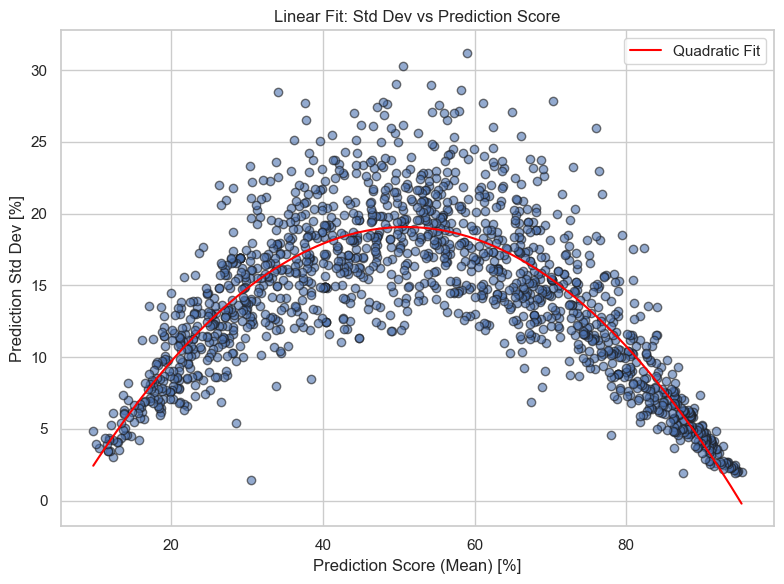

In [28]:
# Plot Standard deviation of predicted substrates against Prediction score
x = df_predicted["PRED_MEAN [%]"]
y = df_predicted["PRED_STD [%]"]

# Fit line: y = mx + b
coeffs = np.polyfit(x, y, 2)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.6, edgecolor='k')
plt.plot(x, np.polyval(coeffs, x), color='red', label='Quadratic Fit')

plt.xlabel("Prediction Score (Mean) [%]")
plt.ylabel("Prediction Std Dev [%]")
plt.title("Linear Fit: Std Dev vs Prediction Score")
plt.legend()
plt.tight_layout()
plt.show()